<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2020/week_42/datasaurus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import seaborn as sns

In [2]:
# Read in data
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-13/datasaurus.csv')
df.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [3]:
# Array of unique dataset names
datasets = df['dataset'].unique()

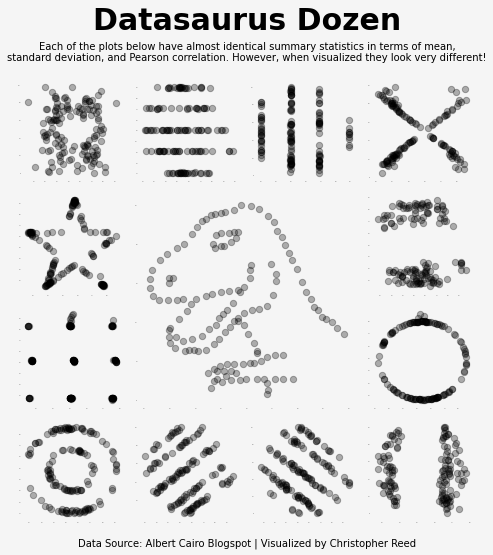

In [4]:
###########################
##PREPARE FIGURE AND AXES##
###########################

# Create figure and axes
fig, axs = plt.subplots(ncols=4, nrows=4, figsize = (8,8))
gs = axs[1, 2].get_gridspec()

# Index position of axes we don't want to plot
delete = [5,6,9,10]


##########################
##ALL PLOTS BUT THE DINO##
##########################

# Iterate through axes and datasets
for ax, data in zip(np.delete(np.ravel(axs), delete), datasets[1:]):

  # Skip the dino
  if data == 'dino':
    continue

  # All other datasets are a go
  else:

    # Filter to dataset
    df_plot = df[df['dataset'] == data]

    # Extract x and y coords
    x = df_plot['x']
    y = df_plot['y']

    # Scatter plot
    ax.scatter(x,y, color = 'black', s = 40, edgecolor = 'black', alpha = 0.3)

    # Background color of plots
    ax.set_facecolor('whitesmoke')

    # Remove ticks and labels from both x and y axis`
    ax.tick_params(axis = 'both', labelsize = 0, length = 0)

    # Despine all sides
    ax = sns.despine(bottom = True, left = True)

    
# Remove the underlying axes where the dino will be
for ax in np.ravel(axs[1:3, 1:3]):
  ax.remove()

################
##ADD THE DINO##
################

# Use gridspec to get larger plot
axbig = fig.add_subplot(gs[1:3, 1:3])

# Scatter plot of dino
axbig.scatter(df[df['dataset'] == 'dino']['x'], df[df['dataset'] == 'dino']['y'], color = 'black', edgecolor = 'black',alpha = 0.3, s = 40)

# Background color of dino
axbig.set_facecolor('whitesmoke')

# Remove ticks and labels from dino pot
axbig.tick_params(axis = 'both', labelsize = 0, length = 0)


#######################
##TITLES AND CAPTIONS##
#######################

title = 'Datasaurus Dozen'

subtitle = """Each of the plots below have almost identical summary statistics in terms of mean,
standard deviation, and Pearson correlation. However, when visualized they look very different!"""

caption = 'Data Source: Albert Cairo Blogspot | Visualized by Christopher Reed'

# Use the center dino plot as the point of reference for all text
axbig.text(0.5, 1.8, title, transform = axbig.transAxes, fontsize = 30, weight = 'bold', ha = 'center')
axbig.text(0.5, 1.65, subtitle, transform = axbig.transAxes, ha = 'center')
axbig.text(0.5, -0.68, caption, transform = axbig.transAxes, ha = 'center')

# Now despine the dino plot
axbig = sns.despine(bottom = True, left = True)

# Figure background color
fig.set_facecolor('whitesmoke')

# Save. Specify dpi and facecolor.
plt.savefig('datasaurus_dozen.jpg', dpi = fig.dpi, facecolor = 'whitesmoke', bbox_inches = 'tight')

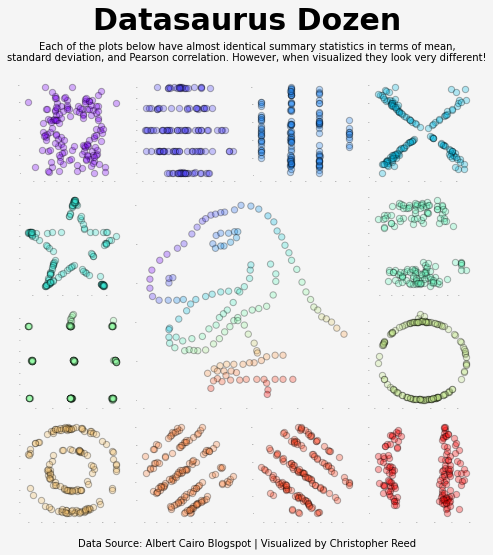

In [7]:
###########################
##PREPARE FIGURE AND AXES##
###########################

# Create figure and axes
fig, axs = plt.subplots(ncols=4, nrows=4, figsize = (8,8))
gs = axs[1, 2].get_gridspec()

# Index position of axes we don't want to plot
delete = [5,6,9,10]


##########################
##ALL PLOTS BUT THE DINO##
##########################

color = iter(cm.rainbow(np.linspace(0,1,12)))

# Iterate through axes and datasets
for ax, data in zip(np.delete(np.ravel(axs), delete), datasets[1:]):

  c = next(color)

  # Skip the dino
  if data == 'dino':
    continue

  # All other datasets are a go
  else:

    # Filter to dataset
    df_plot = df[df['dataset'] == data]

    # Extract x and y coords
    x = df_plot['x']
    y = df_plot['y']

    # Scatter plot
    ax.scatter(x,y, color = c, s = 40, edgecolor = 'black', alpha = 0.3)

    # Background color of plots
    ax.set_facecolor('whitesmoke')

    # Remove ticks and labels from both x and y axis`
    ax.tick_params(axis = 'both', labelsize = 0, length = 0)

    # Despine all sides
    ax = sns.despine(bottom = True, left = True)

    
# Remove the underlying axes where the dino will be
for ax in np.ravel(axs[1:3, 1:3]):
  ax.remove()

################
##ADD THE DINO##
################

# Use gridspec to get larger plot
axbig = fig.add_subplot(gs[1:3, 1:3])

# Dino coords
dino_x = df[df['dataset'] == 'dino']['x']
dino_y = df[df['dataset'] == 'dino']['y']

# Scatter plot of dino
axbig.scatter(dino_x, dino_y, c = np.arctan2(dino_x, dino_y), cmap = 'rainbow', edgecolor = 'black',alpha = 0.3, s = 40)

# Background color of dino
axbig.set_facecolor('whitesmoke')

# Remove ticks and labels from dino pot
axbig.tick_params(axis = 'both', labelsize = 0, length = 0)


#######################
##TITLES AND CAPTIONS##
#######################

title = 'Datasaurus Dozen'

subtitle = """Each of the plots below have almost identical summary statistics in terms of mean,
standard deviation, and Pearson correlation. However, when visualized they look very different!"""

caption = 'Data Source: Albert Cairo Blogspot | Visualized by Christopher Reed'

# Use the center dino plot as the point of reference for all text
axbig.text(0.5, 1.8, title, transform = axbig.transAxes, fontsize = 30, weight = 'bold', ha = 'center')
axbig.text(0.5, 1.65, subtitle, transform = axbig.transAxes, ha = 'center')
axbig.text(0.5, -0.68, caption, transform = axbig.transAxes, ha = 'center')

# Now despine the dino plot
axbig = sns.despine(bottom = True, left = True)

# Figure background color
fig.set_facecolor('whitesmoke')

# Save. Specify dpi and facecolor.
plt.savefig('datasaurus_dozen.jpg', dpi = fig.dpi, facecolor = 'whitesmoke', bbox_inches = 'tight')